# Homework 4 Spring 2022

Due 04/20 23:59 

### Name: Aayush Kumar Verma

### UNI: av2955

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

import pprint 
pp = pprint.PrettyPrinter(indent=4)


# Part 1: Feed forward network from scratch!

For this part, you are not allowed to use any library other than numpy. 

In this part, you will will implement the forward pass and backward pass (i.e. the derivates of each parameter wrt to the loss) for the following neural network:

<img src="/content/nn.png" width=400 height=400/>

The weight matrix for the hidden layer is W1 and has bias b1. 

The weight matrix for the ouput layer is W2 and has bias b2.

Activation function is **sigmoid** for both hidden and output layer

Loss function is the MSE loss $$L(y,y_t) = \frac{1}{2N}\sum_{n=1}^{N}(y^n - y_{t}^{n})^2$$

Refer to the below dictionary for dimensions for each matrix

In [4]:
np.random.seed(0) # don't change this

weights = {
    'W1': np.random.randn(3, 2),
    'b1': np.zeros(3),
    'W2': np.random.randn(3),
    'b2': 0,
}
X = np.random.rand(1000,2)
Y = np.random.randint(low=0, high=2, size=(1000,))

In [5]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [6]:
#Implement the forward pass
def forward_propagation(X, weights):
    # Z1 -> output of the hidden layer before applying activation
    # H -> output of the  hidden layer after applying activation
    # Z2 -> output of the final layer before applying activation
    # Y -> output of the final layer after applying activation
    
    Z1 = np.dot(X, weights['W1'].T)  + weights['b1']
    H = sigmoid(Z1)
    
    Z2 = np.dot(H, weights['W2'].T) + weights['b2']
    Y = sigmoid(Z2)

    return Y, Z2, H, Z1

In [7]:
# Implement the backward pass
# Y_T are the ground truth labels
def back_propagation(X, Y_T, weights):
    N_points = X.shape[0]
    
    # forward propagation
    Y, Z2, H, Z1 = forward_propagation(X, weights)
    L = (1/(2*N_points)) * np.sum(np.square(Y - Y_T))
    
    # back propagation
    dLdY = 1/N_points * (Y - Y_T)
    dLdZ2 = np.multiply(dLdY, (sigmoid(Z2)*(1-sigmoid(Z2))))
    dLdW2 = np.dot(H.T, dLdZ2)
    
    dLdb2 = np.sum(dLdZ2 * 1.0, axis=0)

    dLdH = np.outer(dLdZ2, weights['W2'])
    dHdZ1 = H * (1-H)
    dLdZ1 = np.multiply (dLdH, dHdZ1)
    dLdW1 = np.dot(X.T, dLdZ1)
    
    dLdb1 = np.sum(dLdZ1 * 1.0, axis=0)
    
    gradients = {
        'W1': dLdW1,
        'b1': dLdb1,
        'W2': dLdW2,
        'b2': dLdb2,
    }
    return gradients, L

In [8]:
gradients, L = back_propagation(X, Y, weights)
print(L)

0.1332476222330792


In [9]:
pp.pprint(gradients)

{   'W1': array([[ 0.00244596, -0.00030765, -0.00034768],
       [ 0.00262019, -0.00024188, -0.000372  ]]),
    'W2': array([0.02216011, 0.02433097, 0.01797174]),
    'b1': array([ 0.00492577, -0.00058023, -0.00065977]),
    'b2': 0.029249230265318685}


Your answers should be close to L = 0.133 and 
'b1': array([ 0.00492, -0.000581, -0.00066]). You will be graded based on your implementation and outputs for L, W1, W2 b1, and b2

You can use any library for the following questions.

# Part 2: Fashion MNIST dataset
The Fashion-MNIST dataset is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. It's commonly used as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning models. You can read more about the dataset at the [Fashion-MNIST homepage](https://github.com/zalandoresearch/fashion-mnist). 

We will utilize tensorflow to import the dataset, however, feel free to use any framework (TF/PyTorch) to answer the assignment questions.

In [10]:
from tensorflow.keras.datasets import fashion_mnist

# load data
(xdev, ydev), (xtest, ytest) = fashion_mnist.load_data()

In [11]:
xdev.shape

(60000, 28, 28)

In [12]:
classes = np.unique (ydev)
print (classes)

[0 1 2 3 4 5 6 7 8 9]


### 2.1 Plot the first 25 samples from both development and test sets on two separate 5$\times $5 subplots. 

Each image in your subplot should be labelled with the ground truth label. Get rid of the plot axes for a nicer presentation. You should also label your plots to indicate if the plotted data is from development or test set. You are given the expected output for development samples.

Plots from Development Set


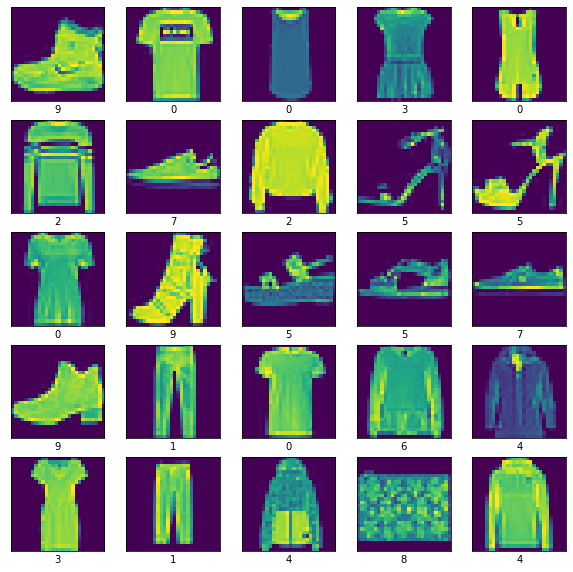

In [74]:
# Plot dev samples

import matplotlib.pyplot as plt

class_names = np.unique(ydev)

print("Plots from Development Set")
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(xdev[i], cmap='viridis')
    plt.xlabel(class_names[ydev[i]])
plt.show()

Plots from Test Set


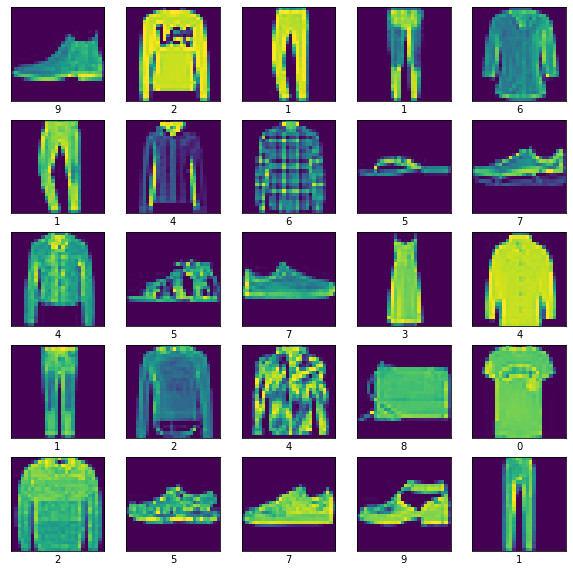

In [75]:
# Plot test samples

print("Plots from Test Set")
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(xtest[i], cmap='viridis')
    plt.xlabel(class_names[ytest[i]])
plt.show()

# Part 3: Feed Forward Network

In this part of the homework, we will build and train a deep neural network on the Fashion-MNIST dataset.

### 3.1.1 Print their shapes - $x_\text{dev}, y_{\text{dev}}, x_\text{test}, y_\text{test}$

In [15]:
# Print
print ("Shape: xdev  = ", xdev.shape)
print ("Shape: ydev  = ", ydev.shape)
print ("Shape: xtest = ", xtest.shape)
print ("Shape: ytest = ", ytest.shape)

Shape: xdev  =  (60000, 28, 28)
Shape: ydev  =  (60000,)
Shape: xtest =  (10000, 28, 28)
Shape: ytest =  (10000,)


### 3.1.2 Flatten the images into one-dimensional vectors. Again, print out the shapes of $x_\text{dev}, x_\text{test}$

In [16]:
# Flatten and print
xdev_flat = xdev.reshape (len(xdev), -1)
xtest_flat = xtest.reshape (len(xtest), -1)

print ("Shape: xdev = ", xdev_flat.shape)
print ("Shape: xtest = ", xtest_flat.shape)

Shape: xdev =  (60000, 784)
Shape: xtest =  (10000, 784)


### 3.1.3 Standardize the development and test sets. 

Note that the images are 28x28 numpy arrays, and each pixel takes value from 0 to 255.0. 0 means background (white), 255 means foreground (black).

In [17]:
# Standardize

xdev_flat = xdev_flat/255.0
xtest_flat = xtest_flat/255.0

### 3.1.4 Assume your neural network has softmax activation as the last layer activation. Would you consider encoding your target variable? Which encoding would you choose and why? The answer depends on your choice of loss function too, you might want to read 2.2.1 and 2.2.5 before answering this one!

Encode the target variable else provide justification for not doing so. Supporting answer may contain your choice of loss function.


In [18]:
# answer
# we should do one hot encoding to calculate cross entropy loss. 
# But we do not need to because TF library function SparseCategoricalCrossentropy automatically does that while calculating CE loss

### 3.1.5 Train-test split your development set into train and validation sets (8:2 ratio). 

Note that splitting after encoding does not causes data leakage here because we know all the classes beforehand.

In [19]:
# split

from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(xdev_flat, ydev, test_size=0.2, random_state=0) 

### 3.2.1 Build the feed forward network

Using Softmax activation for the last layer and ReLU activation for every other layer, build the following model:

1. First hidden layer size - 128
2. Second hidden layer size - 64
3. Third and last layer size - You should know this



In [20]:
# build model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Activation, Dense

In [21]:
model = Sequential([
                    
                    Dense(128, input_shape=(784,)),
                    Activation('relu'),
                    Dense(64),
                    Activation('relu'),
                    Dense(10),
                    Activation('softmax')
])

### 3.2.2 Print out the model summary

In [22]:
# print summary
print (model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
 activation_2 (Activation)   (None, 10)                0         
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trai

### 3.2.3 Report the total number of trainable parameters. Do you think this number is dependent on the image height and width? Only Yes/No required. 

In [23]:
# answer

# Total Trainable Parameters = 109,386
# Yes, it is dependent on the image height and width.

### 3.2.4 Print out your model's output on first train sample. This will confirm if your dimensions are correctly set up. Is the sum of this output equal to 1 upto two decimal places?

In [24]:
#answer

y_hat = model(np.expand_dims(x_train[0], axis=0))
print(y_hat)
print("SUM = {:.2f}".format(np.sum(y_hat)))

tf.Tensor(
[[0.13590413 0.08981015 0.0868933  0.10168499 0.07588299 0.06729142
  0.05545812 0.11169748 0.14947757 0.12589982]], shape=(1, 10), dtype=float32)
SUM = 1.00


### 3.2.5 Considering the output of your model and overall objective, what loss function would you choose and why? Choose a metric for evaluation and explain the reason behind your choice.

In [25]:
# answer

# 1. Cross Entropy Loss - Because we want the learned probablity distribution to be as close as the labelled probability distribution
# 2. Metric for evaluation will be Accuracy because we want to know if our model correctly predicts the clothing item.

### 3.2.6 Using the metric and loss function above, with Adam as the optimizer, train your model for 20 epochs with batch size 128. 

Make sure to save and print out the values of loss function and metric after each epoch for both train and validation sets.

Note - Use appropriate learning rate for the optimizer, you might have to try different values

In [26]:
# train

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

history_callback = model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=128, epochs=20, verbose=1)

Epoch 1/20
375/375 [==============================] - 2s 5ms/step - loss: 0.7295 - sparse_categorical_accuracy: 0.7632 - val_loss: 0.4862 - val_sparse_categorical_accuracy: 0.8324
Epoch 2/20
375/375 [==============================] - 1s 4ms/step - loss: 0.4462 - sparse_categorical_accuracy: 0.8452 - val_loss: 0.4285 - val_sparse_categorical_accuracy: 0.8511
Epoch 3/20
375/375 [==============================] - 1s 4ms/step - loss: 0.4019 - sparse_categorical_accuracy: 0.8607 - val_loss: 0.3972 - val_sparse_categorical_accuracy: 0.8590
Epoch 4/20
375/375 [==============================] - 1s 4ms/step - loss: 0.3774 - sparse_categorical_accuracy: 0.8677 - val_loss: 0.3771 - val_sparse_categorical_accuracy: 0.8666
Epoch 5/20
375/375 [==============================] - 1s 4ms/step - loss: 0.3558 - sparse_categorical_accuracy: 0.8738 - val_loss: 0.3744 - val_sparse_categorical_accuracy: 0.8682
Epoch 6/20
375/375 [==============================] - 1s 4ms/step - loss: 0.3417 - sparse_categorica

### 3.2.7 Plot two separate plots displaying train vs validation loss and train vs validation metric scores over each epoch

[]

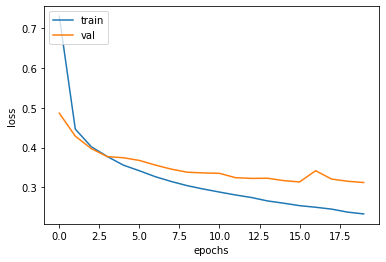

In [27]:
# plot

import pandas as pd

hist = pd.DataFrame(history_callback.history)
fig, ax = plt.subplots()
ax.plot(hist.index, hist["loss"])
ax.plot(hist.index, hist["val_loss"])
ax.set_ylabel("loss")
ax.set_xlabel("epochs")
plt.legend(['train', 'val'], loc='upper left')
plt.plot()

[]

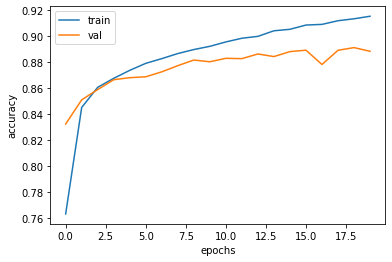

In [28]:
fig, ax = plt.subplots()
ax.plot(hist.index, hist["sparse_categorical_accuracy"])
ax.plot(hist.index, hist["val_sparse_categorical_accuracy"])
ax.set_ylabel("accuracy")
ax.set_xlabel("epochs")
plt.legend(['train', 'val'], loc='upper left')
plt.plot()

### 3.3.1 Report metric score on test set

In [29]:
# evaluate

score = model.evaluate(xtest_flat, ytest, verbose = 0)
print("Test Loss = {:.3f}".format(score[0]))
print("Test Accuracy = {:.3f}".format(score[1]))

Test Loss = 0.331
Test Accuracy = 0.884


### 3.3.2 Plot confusion matrix on the test set and label the axes appropriately with true and predicted labels. 

Labels on the axes should be the original classes (0-9) and not one-hot-encoded. To achieve this, you might have to reverse transform your model's predictions. Please look into the documentation of your target encoder. Sample output is provided

In [30]:
# confusion matrix

y_pred = model.predict(xtest_flat, verbose=0, batch_size=128)
y_pred_classes = np.argmax(y_pred, axis=1)

In [31]:
import seaborn as sns

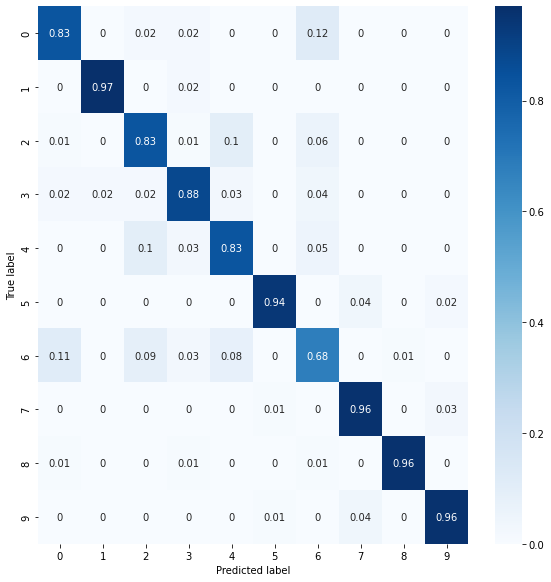

In [32]:
conf_mat = tf.math.confusion_matrix(labels=ytest, predictions=y_pred_classes).numpy()
conf_mat_norm = np.around(conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis], decimals=2)
conf_mat_df = pd.DataFrame(conf_mat_norm,
                     index = classes, 
                     columns = classes)
figure = plt.figure(figsize=(8, 8))
sns.heatmap(conf_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### 3.3.3 Plot the first 25 samples of test dataset on a 5$\times $5 subplot and this time label the images with both the ground truth (GT) and predicted class (P). 

For instance, an image of class 3, with predicted class 7 should have the label GT:3, P:7. Get rid of the plot axes for a nicer presentation.

Plots from Test Set


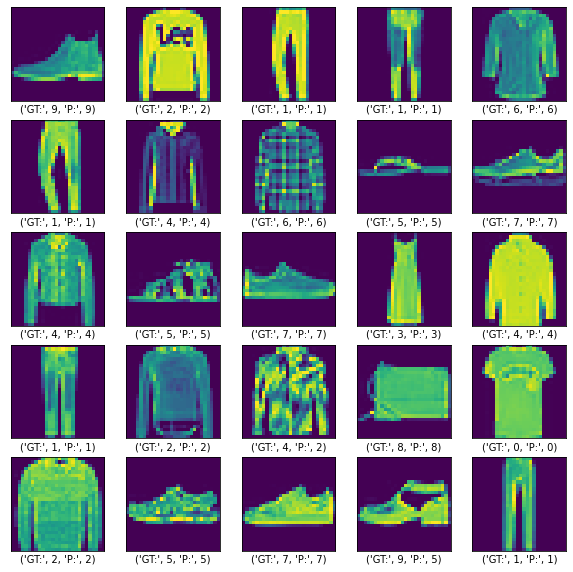

In [80]:
# Plot with predictions

print("Plots from Test Set")
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(xtest[i], cmap='viridis')
    ax = "GT:", class_names[ytest[i]], "P:", class_names[y_pred_classes[i]]
    plt.xlabel(ax)
plt.show()

# Part 4: Convolutional Neural Network

In this part of the homework, we will build and train a classical convolutional neural network, LeNet-5, on the Fashion-MNIST dataset. 

In [62]:
from tensorflow.keras.datasets import fashion_mnist

# load data again
(xdev, ydev), (xtest, ytest) = fashion_mnist.load_data()

### 4.1 Preprocess

1. Standardize the datasets

2. Encode the target variable.

3. Split development set to train and validation sets (8:2).

In [63]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses

In [64]:
# TODO: Standardize the datasets

xdev_flat = xdev.reshape (len(xdev), -1)
xtest_flat = xtest.reshape (len(xtest), -1)

print ("Shape: xdev = ", xdev_flat.shape)
print ("Shape: xtest = ", xtest_flat.shape)

xdev_flat = xdev_flat/255.0
xtest_flat = xtest_flat/255.0


# TODO: Encode the target labels
# TF automatically encodes the target variable with the help of SparseCategoricalCrossentropy so I will skip encoding it manually.
# Reference: https://www.tensorflow.org/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy

Shape: xdev =  (60000, 784)
Shape: xtest =  (10000, 784)


In [65]:
# Split

# Assuming that the distribution is random, so I'm taking the last 12000 (8:2 ratio) 
# items in the dataset as the validation set.

x_val = xdev[-12000:,:] 
y_val = ydev[-12000:] 
x_train = xdev[:-12000,:] 
y_train = ydev[:-12000]

print (len(x_val))
print (len(x_train))
print (len(y_val))
print (len(y_train))

print (x_train.shape)

12000
48000
12000
48000
(48000, 28, 28)


### 4.2.1 LeNet-5

We will be implementing the one of the first CNN models put forward by Yann LeCunn, which is commonly refered to as LeNet-5. The network has the following layers:

1. 2D convolutional layer with 6 filters, 5x5 kernel, stride of 1  padded to yield the same size as input, ReLU activation
2. Maxpooling layer of 2x2
3. 2D convolutional layer with 16 filters, 5x5 kernel, 0 padding, ReLU activation 
4. Maxpooling layer of 2x2 
5. 2D convolutional layer with 120 filters, 5x5 kernel, ReLU activation. Note that this layer has 120 output channels (filters), and each channel has only 1 number. The output of this layer is just a vector with 120 units!
6. A fully connected layer with 84 units, ReLU activation
7. The output layer where each unit respresents the probability of image being in that category. What activation function should you use in this layer? (You should know this)

In [66]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses

In [67]:
# TODO: build the model

cnn = Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=6, kernel_size=(5,5), activation='relu', padding='same', strides = 1, input_shape=(28,28,1)))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
cnn.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(5,5), activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
cnn.add(tf.keras.layers.Conv2D(filters=120, kernel_size=(5,5), activation='relu'))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=84, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=10, activation='softmax'))

### 4.2.2 Report layer output

Report the output dimensions of each layers of LeNet-5. **Hint:** You can report them using the model summary function that most frameworks have, or you can calculate and report the output dimensions by hand (It's actually not that hard and it's a good practice too!)

In [68]:
# TODO: report model output dimensions
cnn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 6)        0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 1, 1, 120)         48120     
                                                                 
 flatten_3 (Flatten)         (None, 120)              

### 4.2.3 Model training

Train the model for 10 epochs. In each epoch, record the loss and metric (chosen in part 3) scores for both train and validation sets. Use two separate plots to display train vs validation metric scores and train vs validation loss. Finally, report the model performance on the test set. Feel free to tune the hyperparameters such as batch size and optimizers to achieve better performance.

In [69]:
# TODO: Train the model

cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

history_callback = cnn.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=64, epochs=10, verbose=1)

Epoch 1/10
750/750 [==============================] - 5s 6ms/step - loss: 0.7275 - sparse_categorical_accuracy: 0.7862 - val_loss: 0.4494 - val_sparse_categorical_accuracy: 0.8425
Epoch 2/10
750/750 [==============================] - 4s 6ms/step - loss: 0.3983 - sparse_categorical_accuracy: 0.8581 - val_loss: 0.3964 - val_sparse_categorical_accuracy: 0.8591
Epoch 3/10
750/750 [==============================] - 4s 6ms/step - loss: 0.3425 - sparse_categorical_accuracy: 0.8765 - val_loss: 0.3612 - val_sparse_categorical_accuracy: 0.8678
Epoch 4/10
750/750 [==============================] - 4s 6ms/step - loss: 0.3117 - sparse_categorical_accuracy: 0.8873 - val_loss: 0.3509 - val_sparse_categorical_accuracy: 0.8749
Epoch 5/10
750/750 [==============================] - 4s 6ms/step - loss: 0.2892 - sparse_categorical_accuracy: 0.8929 - val_loss: 0.3540 - val_sparse_categorical_accuracy: 0.8767
Epoch 6/10
750/750 [==============================] - 4s 6ms/step - loss: 0.2695 - sparse_categorica

[]

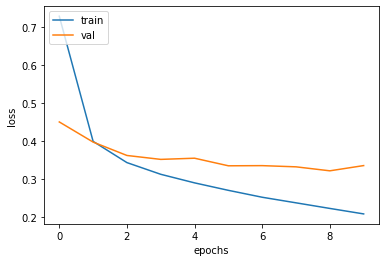

In [70]:
# TODO: Plot accuracy and loss over epochs

import pandas as pd

hist = pd.DataFrame(history_callback.history)
fig, ax = plt.subplots()
ax.plot(hist.index, hist["loss"])
ax.plot(hist.index, hist["val_loss"])
ax.set_ylabel("loss")
ax.set_xlabel("epochs")
plt.legend(['train', 'val'], loc='upper left')
plt.plot()

[]

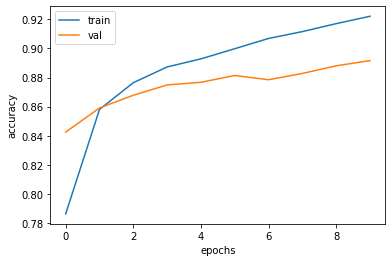

In [71]:
fig, ax = plt.subplots()
ax.plot(hist.index, hist["sparse_categorical_accuracy"])
ax.plot(hist.index, hist["val_sparse_categorical_accuracy"])
ax.set_ylabel("accuracy")
ax.set_xlabel("epochs")
plt.legend(['train', 'val'], loc='upper left')
plt.plot()

In [72]:
# TODO: Report model performance on test set

score = cnn.evaluate(xtest, ytest, verbose = 0)
print("Test Loss = {:.3f}".format(score[0]))
print("Test Accuracy = {:.3f}".format(score[1]))

Test Loss = 0.348
Test Accuracy = 0.884


**What do you see from the plots? Are there signs of overfitting? If so, what are 
the signs and what techniques can we use to combat overfitting?**

###### From the above plots, we can see that there is overfitting because the accuracy of train set is more than the validation set and similarly, the loss in the train set drops to a much lower value than the validation set. 

###### To overcome overfitting, we make use of Dropout, Batch Normalization or a combination of both.

### 4.2.4 Report metric score on test set

In [45]:
# evaluate on test set

# Skipping this as per the Ed Post

### 4.3 Overfitting

### 4.3.1 Drop-out

To overcome overfitting, we will train the network again with dropout this time. For hidden layers use dropout probability of 0.5. Train the model again for 15 epochs, use two plots to display train vs validation metric scores and train vs validation loss over each epoch. Report model performance on test set. What's your observation?

In [46]:
# TODO: build the model with drop-out layers

cnn_dropout = Sequential()
cnn_dropout.add(tf.keras.layers.Conv2D(filters=6, kernel_size=(5,5), activation='relu', padding='same', strides = 1, input_shape=(28,28,1)))
cnn_dropout.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
cnn_dropout.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(5,5), activation='relu'))
cnn_dropout.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
cnn_dropout.add(tf.keras.layers.Conv2D(filters=120, kernel_size=(5,5), activation='relu'))
cnn_dropout.add(tf.keras.layers.Flatten())
cnn_dropout.add(tf.keras.layers.Dropout(0.5))
cnn_dropout.add(tf.keras.layers.Dense(units=84, activation='relu'))
cnn_dropout.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [47]:
# TODO: train the model

cnn_dropout.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

history_callback = cnn_dropout.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=64, epochs=15, verbose=1)

Epoch 1/15
750/750 [==============================] - 6s 7ms/step - loss: 1.0529 - sparse_categorical_accuracy: 0.6584 - val_loss: 0.4974 - val_sparse_categorical_accuracy: 0.8129
Epoch 2/15
750/750 [==============================] - 4s 6ms/step - loss: 0.5830 - sparse_categorical_accuracy: 0.7899 - val_loss: 0.4187 - val_sparse_categorical_accuracy: 0.8484
Epoch 3/15
750/750 [==============================] - 4s 6ms/step - loss: 0.4887 - sparse_categorical_accuracy: 0.8259 - val_loss: 0.3939 - val_sparse_categorical_accuracy: 0.8589
Epoch 4/15
750/750 [==============================] - 4s 6ms/step - loss: 0.4404 - sparse_categorical_accuracy: 0.8426 - val_loss: 0.3712 - val_sparse_categorical_accuracy: 0.8674
Epoch 5/15
750/750 [==============================] - 4s 6ms/step - loss: 0.4042 - sparse_categorical_accuracy: 0.8540 - val_loss: 0.3598 - val_sparse_categorical_accuracy: 0.8710
Epoch 6/15
750/750 [==============================] - 4s 6ms/step - loss: 0.3782 - sparse_categorica

[]

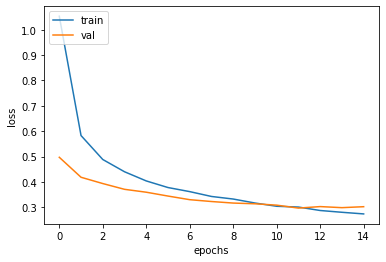

In [48]:
# TODO: plot 

import pandas as pd

hist = pd.DataFrame(history_callback.history)
fig, ax = plt.subplots()
ax.plot(hist.index, hist["loss"])
ax.plot(hist.index, hist["val_loss"])
ax.set_ylabel("loss")
ax.set_xlabel("epochs")
plt.legend(['train', 'val'], loc='upper left')
plt.plot()

[]

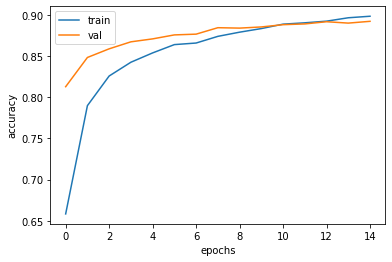

In [49]:
fig, ax = plt.subplots()
ax.plot(hist.index, hist["sparse_categorical_accuracy"])
ax.plot(hist.index, hist["val_sparse_categorical_accuracy"])
ax.set_ylabel("accuracy")
ax.set_xlabel("epochs")
plt.legend(['train', 'val'], loc='upper left')
plt.plot()

In [50]:
# TODO: Report model performance on test set

score = cnn_dropout.evaluate(xtest, ytest, verbose = 0)
print("Test Loss = {:.3f}".format(score[0]))
print("Test Accuracy = {:.3f}".format(score[1]))

Test Loss = 0.323
Test Accuracy = 0.886


**What's your observation?**

**Answer:** 

###### Comparing these plots with that of the CNN model without Dropout, we find that there is no overfitting now as the accuracy and loss for both train set and validation set are similar at the end of 15 epochs.

###### The accuracy of this model is also better than that of the CNN model without Dropout, i.e., 0.886 as compared to 0.884.

### 4.3.2 Batch Normalization

This time, let's apply a batch normalization after every hidden layer, train the model for 15 epochs, plot the metric scores and loss values, and report model performance on test set as above. Compare this technique with the original model and with dropout, which technique do you think helps with overfitting better?

In [50]:
# TODO: build the model with batch normalization layers

cnn_bn = Sequential()
cnn_bn.add(tf.keras.layers.Conv2D(filters=6, kernel_size=(5,5), activation='relu', padding='same', strides = 1, input_shape=(28,28,1)))
cnn_bn.add(tf.keras.layers.BatchNormalization())
cnn_bn.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
cnn_bn.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(5,5), activation='relu'))
cnn_bn.add(tf.keras.layers.BatchNormalization())
cnn_bn.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
cnn_bn.add(tf.keras.layers.Conv2D(filters=120, kernel_size=(5,5), activation='relu'))
cnn_bn.add(tf.keras.layers.BatchNormalization())
cnn_bn.add(tf.keras.layers.Flatten())
cnn_bn.add(tf.keras.layers.Dense(units=84, activation='relu'))
cnn_bn.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [51]:
# TODO: train the model

cnn_bn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

history_callback = cnn_bn.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=64, epochs=15, verbose=1)

Epoch 1/15
750/750 [==============================] - 7s 8ms/step - loss: 0.5067 - sparse_categorical_accuracy: 0.8199 - val_loss: 0.3871 - val_sparse_categorical_accuracy: 0.8592
Epoch 2/15
750/750 [==============================] - 5s 7ms/step - loss: 0.3303 - sparse_categorical_accuracy: 0.8793 - val_loss: 0.3285 - val_sparse_categorical_accuracy: 0.8813
Epoch 3/15
750/750 [==============================] - 5s 7ms/step - loss: 0.2874 - sparse_categorical_accuracy: 0.8943 - val_loss: 0.3119 - val_sparse_categorical_accuracy: 0.8842
Epoch 4/15
750/750 [==============================] - 5s 7ms/step - loss: 0.2585 - sparse_categorical_accuracy: 0.9039 - val_loss: 0.3055 - val_sparse_categorical_accuracy: 0.8889
Epoch 5/15
750/750 [==============================] - 5s 7ms/step - loss: 0.2385 - sparse_categorical_accuracy: 0.9120 - val_loss: 0.3357 - val_sparse_categorical_accuracy: 0.8755
Epoch 6/15
750/750 [==============================] - 5s 7ms/step - loss: 0.2220 - sparse_categorica

[]

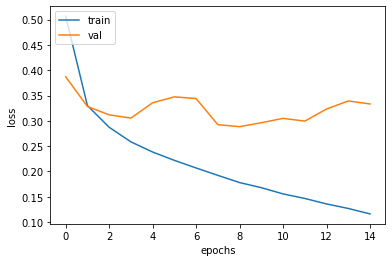

In [52]:
# TODO: plot

import pandas as pd

hist = pd.DataFrame(history_callback.history)
fig, ax = plt.subplots()
ax.plot(hist.index, hist["loss"])
ax.plot(hist.index, hist["val_loss"])
ax.set_ylabel("loss")
ax.set_xlabel("epochs")
plt.legend(['train', 'val'], loc='upper left')
plt.plot()

[]

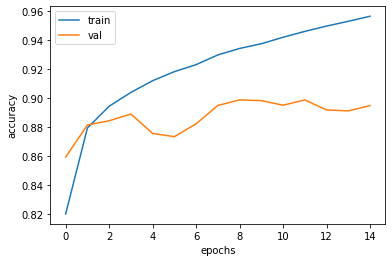

In [53]:
fig, ax = plt.subplots()
ax.plot(hist.index, hist["sparse_categorical_accuracy"])
ax.plot(hist.index, hist["val_sparse_categorical_accuracy"])
ax.set_ylabel("accuracy")
ax.set_xlabel("epochs")
plt.legend(['train', 'val'], loc='upper left')
plt.plot()

In [54]:
# TODO: Report model performance on test set

score = cnn_bn.evaluate(xtest, ytest, verbose = 0)
print("Test Loss = {:.3f}".format(score[0]))
print("Test Accuracy = {:.3f}".format(score[1]))

Test Loss = 0.352
Test Accuracy = 0.890


**Observation, comparison with Dropout:**

**Answer**:

###### Comparing the Batch Normalization model with Dropout, we see that there is still overfitting however, the accuracy of this model is better than that of the Dropout model, i.e., 0.890 as compared to 0.886.

###### We can reduce the overfitting also by applying Batch Normalization and Dropout together. The results of such a model has been shown below.

In [9]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses
from keras.models import Sequential
from keras.layers import Activation, Dense

# Building the Model

cnn_bn_dropout = Sequential()
cnn_bn_dropout.add(tf.keras.layers.Conv2D(filters=6, kernel_size=(5,5), activation='relu', padding='same', strides = 1, input_shape=(28,28,1)))
cnn_bn_dropout.add(tf.keras.layers.BatchNormalization())
cnn_bn_dropout.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
cnn_bn_dropout.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(5,5), activation='relu'))
cnn_bn_dropout.add(tf.keras.layers.BatchNormalization())
cnn_bn_dropout.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
cnn_bn_dropout.add(tf.keras.layers.Conv2D(filters=120, kernel_size=(5,5), activation='relu'))
cnn_bn_dropout.add(tf.keras.layers.BatchNormalization())
cnn_bn_dropout.add(tf.keras.layers.Flatten())
cnn_bn_dropout.add(tf.keras.layers.Dropout(0.5))
cnn_bn_dropout.add(tf.keras.layers.Dense(units=84, activation='relu'))
cnn_bn_dropout.add(tf.keras.layers.Dense(units=10, activation='softmax'))

# Training the Model

cnn_bn_dropout.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

history_callback = cnn_bn_dropout.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=64, epochs=15, verbose=1)

Epoch 1/15
750/750 [==============================] - 9s 10ms/step - loss: 0.6469 - sparse_categorical_accuracy: 0.7746 - val_loss: 0.4089 - val_sparse_categorical_accuracy: 0.8494
Epoch 2/15
750/750 [==============================] - 6s 8ms/step - loss: 0.4300 - sparse_categorical_accuracy: 0.8458 - val_loss: 0.3598 - val_sparse_categorical_accuracy: 0.8672
Epoch 3/15
750/750 [==============================] - 5s 7ms/step - loss: 0.3768 - sparse_categorical_accuracy: 0.8645 - val_loss: 0.3272 - val_sparse_categorical_accuracy: 0.8797
Epoch 4/15
750/750 [==============================] - 5s 7ms/step - loss: 0.3467 - sparse_categorical_accuracy: 0.8736 - val_loss: 0.3166 - val_sparse_categorical_accuracy: 0.8832
Epoch 5/15
750/750 [==============================] - 5s 7ms/step - loss: 0.3267 - sparse_categorical_accuracy: 0.8823 - val_loss: 0.2989 - val_sparse_categorical_accuracy: 0.8918
Epoch 6/15
750/750 [==============================] - 5s 7ms/step - loss: 0.3088 - sparse_categoric

[]

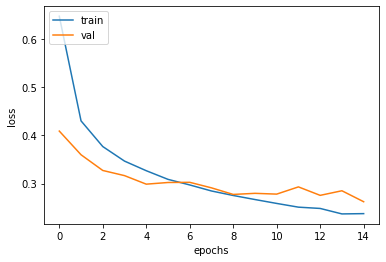

In [10]:
# Plots

hist = pd.DataFrame(history_callback.history)
fig, ax = plt.subplots()
ax.plot(hist.index, hist["loss"])
ax.plot(hist.index, hist["val_loss"])
ax.set_ylabel("loss")
ax.set_xlabel("epochs")
plt.legend(['train', 'val'], loc='upper left')
plt.plot()

[]

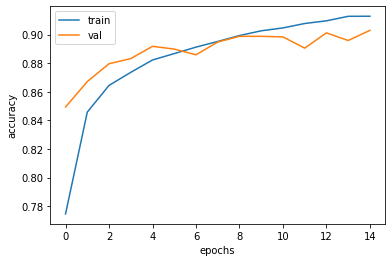

In [11]:
fig, ax = plt.subplots()
ax.plot(hist.index, hist["sparse_categorical_accuracy"])
ax.plot(hist.index, hist["val_sparse_categorical_accuracy"])
ax.set_ylabel("accuracy")
ax.set_xlabel("epochs")
plt.legend(['train', 'val'], loc='upper left')
plt.plot()

In [12]:
# Report model performance on test set

score = cnn_bn_dropout.evaluate(xtest, ytest, verbose = 0)
print("Test Loss = {:.3f}".format(score[0]))
print("Test Accuracy = {:.3f}".format(score[1]))

Test Loss = 0.280
Test Accuracy = 0.898


###### Here, we see that the overfitting has reduced to a large extent for 15 epochs and around 8 epochs there is no overfitting. The accuracy of this model is better than all the above models, i.e., 0.898.